In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

C:\Anaconda\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import sklearn.metrics as sm
from sklearn.decomposition import PCA

In [3]:
emp_df=pd.read_csv('Employee_Compensation_SF.csv')
emp_df.head(5)

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2016,1,Public Protection,DAT,District Attorney,311.0,Municipal Attorneys' Association,8100,Legal & Court,...,49919,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,Calendar,2013,5,Culture & Recreation,ART,Arts Commission,790.0,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",...,1225,84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,Calendar,2015,4,Community Health,DPH,Public Health,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,...,34873,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,Fiscal,2015,4,Community Health,DPH,Public Health,250.0,"SEIU - Health Workers, Local 1021",2200,Medical & Dental,...,51145,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,Fiscal,2014,5,Culture & Recreation,REC,Recreation and Park Commission,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,...,48705,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64


In [4]:
emp_df.describe()

,Year,Organization Group Code,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
count,291825.000000,291825.000000,291782.000000,291825.000000,291825.000000,291825.000000,291825.000000,291825.000000,291825.000000,291825.000000,291825.000000,291825.000000,291825.000000
mean,2014.325061,2.977051,489.506076,26917.830316,63210.172887,4406.877440,3781.032870,71398.083196,12937.728957,8921.893732,4644.276407,26503.899096,97901.982292
std,1.032265,1.577771,333.761136,15548.201987,44660.462305,11079.405928,7697.665317,52224.214099,9785.064808,4900.318083,3787.907010,16800.143147,67777.549152
min,2013.000000,1.000000,1.000000,1.000000,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-2940.470000,-10636.500000,-21295.150000,-74082.610000
25%,2013.000000,2.000000,216.000000,13444.000000,23281.920000,0.000000,0.000000,25276.010000,3549.540000,4318.170000,1587.190000,9604.500000,35817.450000
50%,2014.000000,2.000000,535.000000,27003.000000,62519.120000,0.000000,697.080000,67847.870000,13167.730000,11966.610000,4349.090000,30316.690000,98022.370000
75%,2015.000000,4.000000,790.000000,40401.000000,92910.710000,2766.580000,4621.480000,103148.090000,19570.330000,12801.790000,6829.480000,38720.820000,142058.420000
max,2016.000000,7.000000,990.000000,53794.000000,515101.800000,227313.620000,342802.630000,515101.800000,105052.980000,21872.800000,35157.630000,141043.640000,653498.150000


In [5]:
emp_df.isnull().sum()

Year Type                   0
Year                        0
Organization Group Code     0
Organization Group          0
Department Code             0
Department                  0
Union Code                 43
Union                      43
Job Family Code            45
Job Family                 45
Job Code                    0
Job                         0
Employee Identifier         0
Salaries                    0
Overtime                    0
Other Salaries              0
Total Salary                0
Retirement                  0
Health/Dental               0
Other Benefits              0
Total Benefits              0
Total Compensation          0
dtype: int64

In [6]:
emp_df.dropna(axis=0,inplace=True)

In [7]:
emp_df.shape

(291780, 22)

In [8]:
emp_df.drop(emp_df[(emp_df['Salaries']<=0)|(emp_df['Overtime']<0)|(emp_df['Other Salaries']<0)|(emp_df['Total Salary']<=0)
       |(emp_df['Retirement']<0)|(emp_df['Health/Dental']<0)|(emp_df['Other Benefits']<0)|(emp_df['Total Benefits']<0)|
      (emp_df['Total Compensation']<=0)].index,axis=0,inplace=True)

# Average Compensation of Each Department

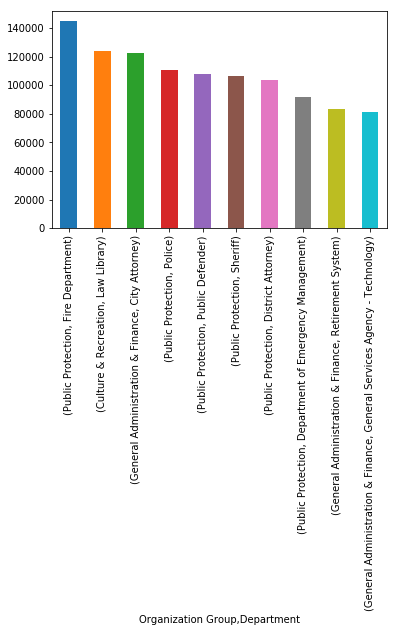

In [9]:
organisation_mean_salary=emp_df.groupby(['Organization Group','Department'])['Total Salary'].agg('mean').sort_values(ascending=False)
round(organisation_mean_salary,2)
organisation_mean_salary.head(10).plot(kind='bar')

# Average Compensation of each Job Family

In [10]:
Job_mean_salary=emp_df.groupby(['Job Family','Job'])['Total Salary'].agg('mean').sort_values(ascending=False)
round(Job_mean_salary,2).head(10)


Job Family                     Job                         
Management                     Chief Of Police                 338291.45
                               Chief, Fire Department          328750.46
Street Transit                 Gen Mgr, Public Trnsp Dept      300544.19
Administrative & Mgmt (Unrep)  Chief Investment Officer        289266.49
Fire Services                  Asst Chf Of Dept (Fire Dept)    286307.60
Administrative & Mgmt (Unrep)  Mayor                           284128.85
Management                     Dept Head V                     272914.20
                               Adm, SFGH Medical Center        272341.20
                               Controller                      271551.47
                               Dep Chf Of Dept (Fire Dept)     267710.87
Name: Total Salary, dtype: float64

In [11]:
year_wise_salary=emp_df.groupby(['Year','Organization Group'])['Total Salary'].agg(['min','max','mean','std'])
round(year_wise_salary,2)


min        max       mean  \
Year Organization Group                                                        
2013 Community Health                            22.57  322886.84   69129.45   
     Culture & Recreation                        15.83  227406.42   34614.47   
     General Administration & Finance            21.19  335537.96   64877.64   
     General City Responsibilities                9.98  120000.00   16592.88   
     Human Welfare & Neighborhood Development    25.00  273641.56   48870.20   
     Public Protection                           46.15  381716.83  111885.08   
     Public Works, Transportation & Commerce     14.26  313312.52   71788.90   
2014 Community Health                             6.00  313955.62   68989.87   
     Culture & Recreation                        15.50  226832.02   33474.24   
     General Administration & Finance             0.57  351541.89   64127.07   
     General City Responsibilities             1287.00   34124.80    9806.30   
     Human Welfare & Neighborhood Development    26.23  267936.63   45592.37   
     Public Protection                           50.00  471952.64  109958.83   
     Public Works, Transportation & Commerce     16.09  311298.55   70193.47   
2015 Community Health                            19.12  338390.32   71846.91   
     Culture & Recreation                        11.94  235457.90   34601.00   
     General Administration & Finance            20.19  507831.60   67255.91   
     General City Responsibilities             1584.18    4220.50    2344.27   
     Human Welfare & Neighborhood Development    23.54  279560.98   44521.40   
     Public Protection                           72.40  366487.20  110492.20   
     Public Works, Transportation & Commerce     15.88  336774.04   70020.96   
2016 Community Health                            20.47  342586.87   74283.78   
     Culture & Recreation                        18.49  241298.70   35179.54   
     General Administration & Finance            20.19  515101.80   68506.42   
     General City Responsibilities             4220.50    4220.50    4220.50   
     Human Welfare & Neighborhood Development    28.45  287259.06   50087.39   
     Public Protection                           36.28  392721.50  108992.94   
     Public Works, Transportation & Commerce     24.21  334779.09   73673.97   

                                                    std  
Year Organization Group                                  
2013 Community Health                          48397.05  
     Culture & Recreation                      34244.69  
     General Administration & Finance          48807.90  
     General City Responsibilities             17210.88  
     Human Welfare & Neighborhood Development  38025.28  
     Public Protection                         57533.80  
     Public Works, Transportation & Commerce   41087.29  
2014 Community Health                          48737.63  
     Culture & Recreation                      34246.94  
     General Administration & Finance          48848.69  
     General City Responsibilities             12713.62  
     Human Welfare & Neighborhood Development  36901.47  
     Public Protection                         56203.79  
     Public Works, Transportation & Commerce   42141.60  
2015 Community Health                          50682.75  
     Culture & Recreation                      35442.99  
     General Administration & Finance          50676.18  
     General City Responsibilities              1254.44  
     Human Welfare & Neighborhood Development  39105.64  
     Public Protection                         57550.89  
     Public Works, Transportation & Commerce   43096.63  
2016 Community Health                          52603.73  
     Culture & Recreation                      36280.87  
     General Administration & Finance          51740.58  
     General City Responsibilities                  NaN  
     Human Welfare & Neighborhood Development  40447.95  
     Public Protection    

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


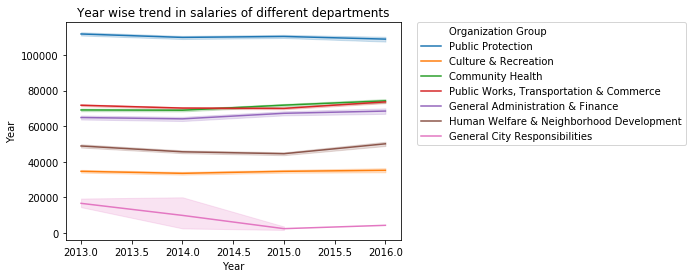

In [12]:
sns.lineplot(x='Year',y='Total Salary',hue='Organization Group',data=emp_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Year')
plt.title('Year wise trend in salaries of different departments');
plt.show()

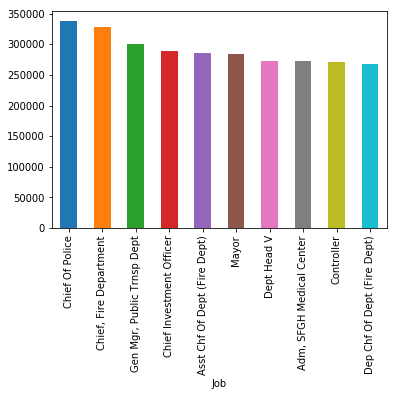

In [13]:
emp_df.groupby(['Job'])['Total Salary'].agg('mean').sort_values(ascending=False).head(10).plot(kind='bar')

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000553EBE8BA8>,
      dtype=object)

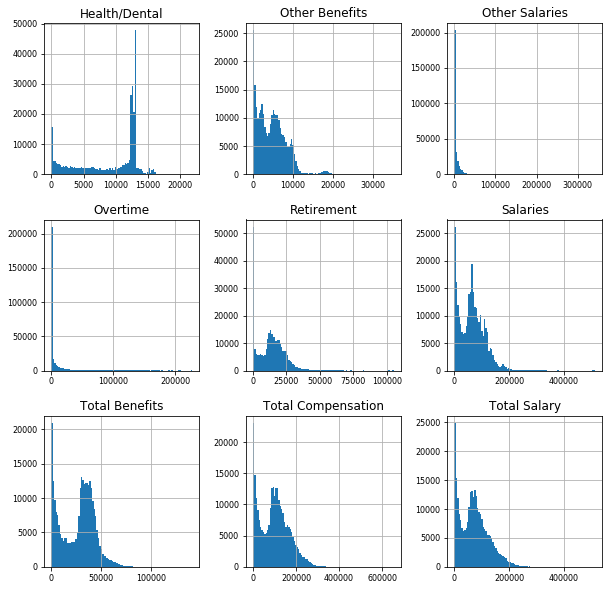

In [14]:
df_num = emp_df.select_dtypes(include = ['float64', 'int64'])
df_num.columns
df_num.drop(['Year','Organization Group Code','Union Code','Employee Identifier'],inplace=True,axis=1)
df_num.hist(figsize=(10,10),bins=100, xlabelsize=8, ylabelsize=8)

In [15]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(12, 7))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

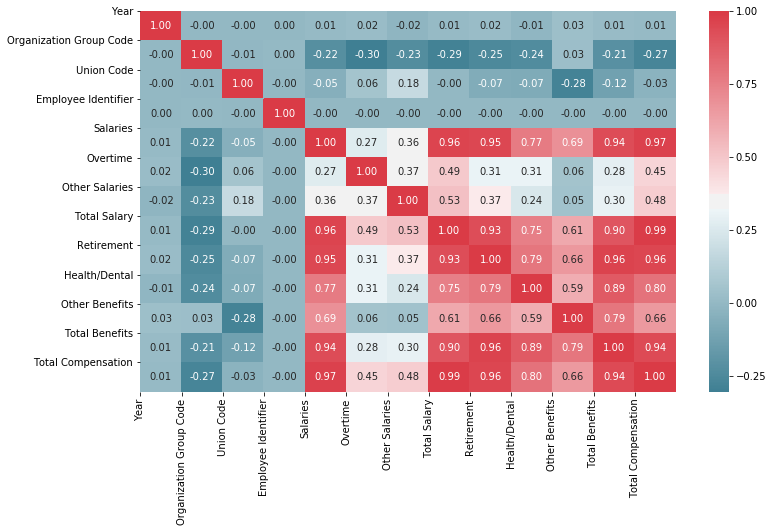

In [16]:
heatMap(emp_df)

In [17]:
emp_df.dropna(axis=0,inplace=True)

In [18]:
emp_df.isnull().sum()

Year Type                  0
Year                       0
Organization Group Code    0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family Code            0
Job Family                 0
Job Code                   0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health/Dental              0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [19]:
emp_df.shape

(287092, 22)

In [20]:
emp_df.reset_index(drop=True, inplace=True)

In [21]:
emp_df[['Year','Organization Group Code']] = emp_df[['Year','Organization Group Code']].astype(str)

In [22]:
cat_x = emp_df[['Year Type','Year','Organization Group Code','Department Code','Job Family Code']].copy()
num_x = emp_df[['Overtime','Other Salaries','Health/Dental','Other Benefits']].copy()
target = emp_df['Total Compensation'].copy()

In [23]:
cat_x = pd.get_dummies(cat_x)

In [24]:
n_data = pd.concat([num_x,cat_x], axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(n_data, target, test_size=0.25, random_state=0)

In [26]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [29]:
print('Train R2:',sm.r2_score(y_train,train_pred))
print('Test  R2:',sm.r2_score(y_test,y_pred))

Train R2: 0.9056862383376965
Test  R2: 0.9052573609797099


In [30]:
print('Train loss:',np.sqrt(sm.mean_squared_error(y_train,train_pred)))
print('Test  loss:',np.sqrt(sm.mean_squared_error(y_test,y_pred)))

Train loss: 20675.28560100403
Test  loss: 20729.441663355443


# Ridge Regression

In [31]:
model_ridge = Ridge(random_state=0, alpha=1.0, max_iter=1000, solver='saga')
model_ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=0, solver='saga', tol=0.001)

In [32]:
train_pred = model_ridge.predict(X_train)
y_pred = model_ridge.predict(X_test)

In [33]:
print('Train R2:',sm.r2_score(y_train,train_pred))
print('Test  R2:',sm.r2_score(y_test,y_pred))

Train R2: 0.9056914074995212
Test  R2: 0.9052627959871475


In [34]:
print('Train loss:',np.sqrt(sm.mean_squared_error(y_train,train_pred)))
print('Test  loss:',np.sqrt(sm.mean_squared_error(y_test,y_pred)))

Train loss: 20674.719006269665
Test  loss: 20728.847072120643
